In [2]:
import pandas as pd
from modules import data
from modules import metrics
from modules import valuation
from modules import visualisation
from modules import csv_dowloader

In [3]:
csv_dowloader.download_csv("enph")

In [4]:
# define parameters
CURRENT_PRICE = 82.92
BETA = 1.51

CAP_GROWTH = 1.15
MARKET_RETURN = 0.1
RISK_FREE_RETURN = 0.035

In [5]:
#get data
df = data.get_data()

In [6]:
df.columns

Index(['year', 'Revenue', 'Interest_Expense_(Operating)', 'EBT',
       'Income_Tax_Provision', 'Net_Income_Common', 'EPS_(Diluted)',
       'Shares_(Diluted,_Weighted)', 'Gross_Margin', 'Net_Profit_Margin',
       'Free_Cash_Flow_Margin', 'Operating_Cash_Flow_Margin',
       'Cash_and_Short_Term_Investments', 'Total_current_assets',
       'Total_non-current_assets', 'Total_Assets', 'Total_current_liabilities',
       'Total_non-current_liabilities', 'Total_liabilities',
       'Shareholders_Equity_(Total)', 'Total_Debt', 'Operating_Cash_Flow',
       'Investing_cash_flow', 'Financing_cash_flow',
       'Stock_Based_Compensation', 'Issuance/Purchase_of_Shares', 'P/E_ratio',
       'P/FCF_ratio', 'P/Operating_CF', 'P/B_ratio', 'Current_Ratio',
       'Debt/Assets', 'Debt/Equity', 'Interest_Coverage', 'ROE', 'ROA', 'ROIC',
       'Book_value_per_Share', 'Free_Cash_Flow', 'dividend_per_share',
       'payout_ratio'],
      dtype='object', name='Unnamed: 0')

# profitability

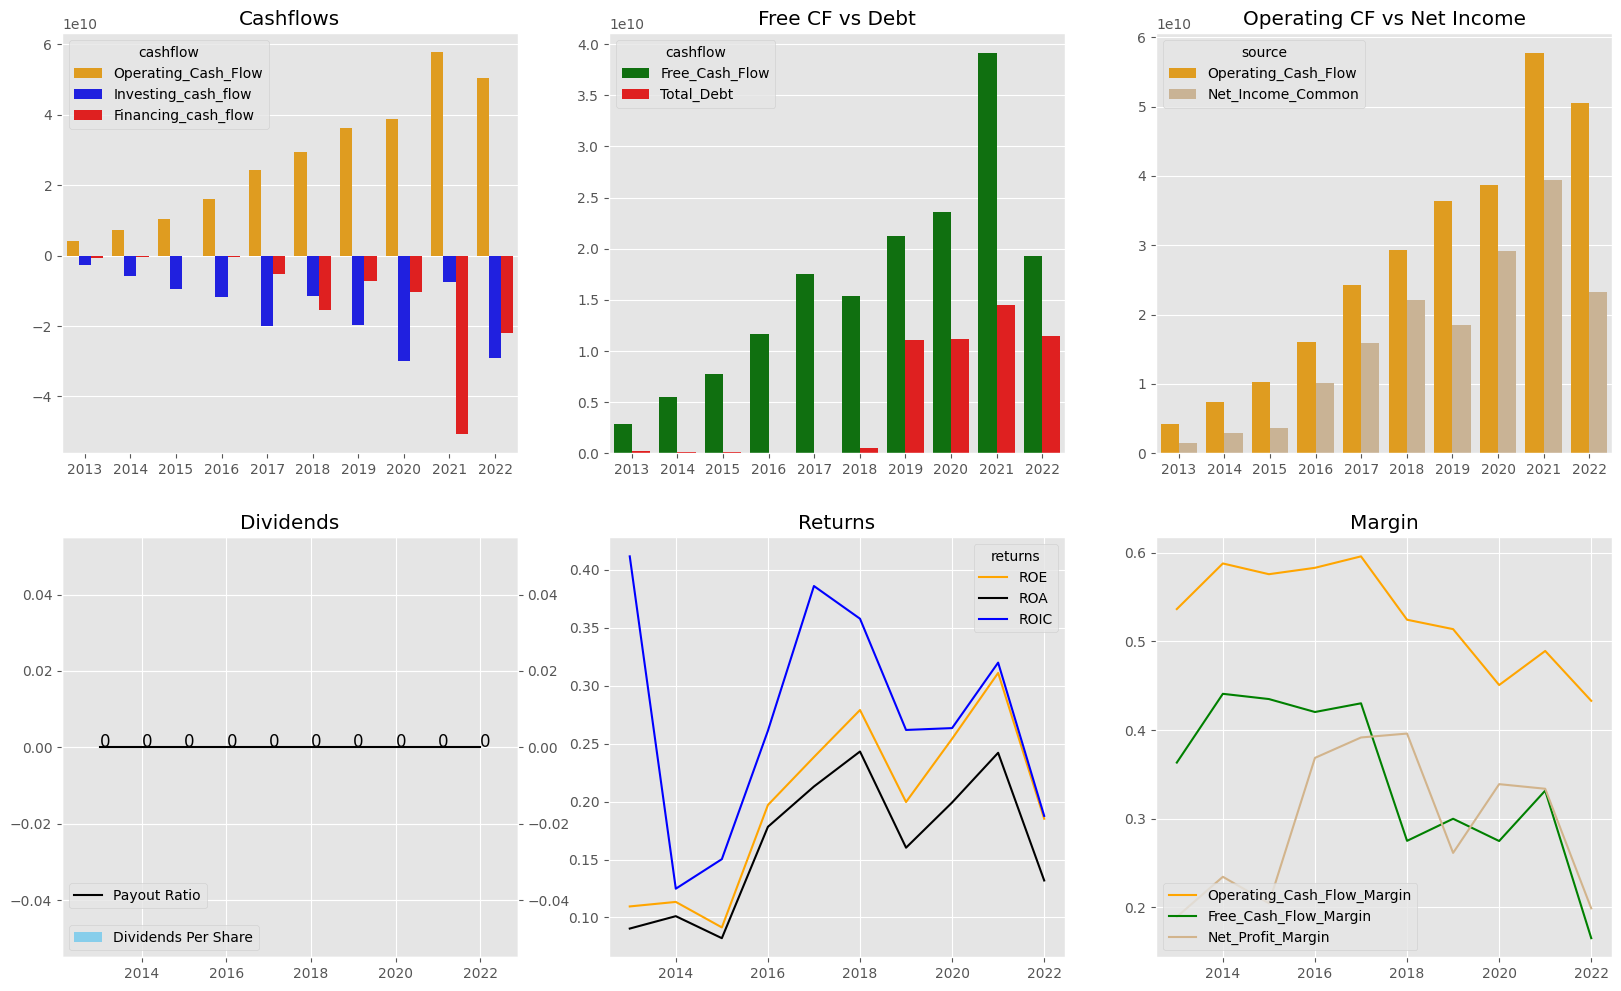

In [7]:
visualisation.visualise_profitability(df)

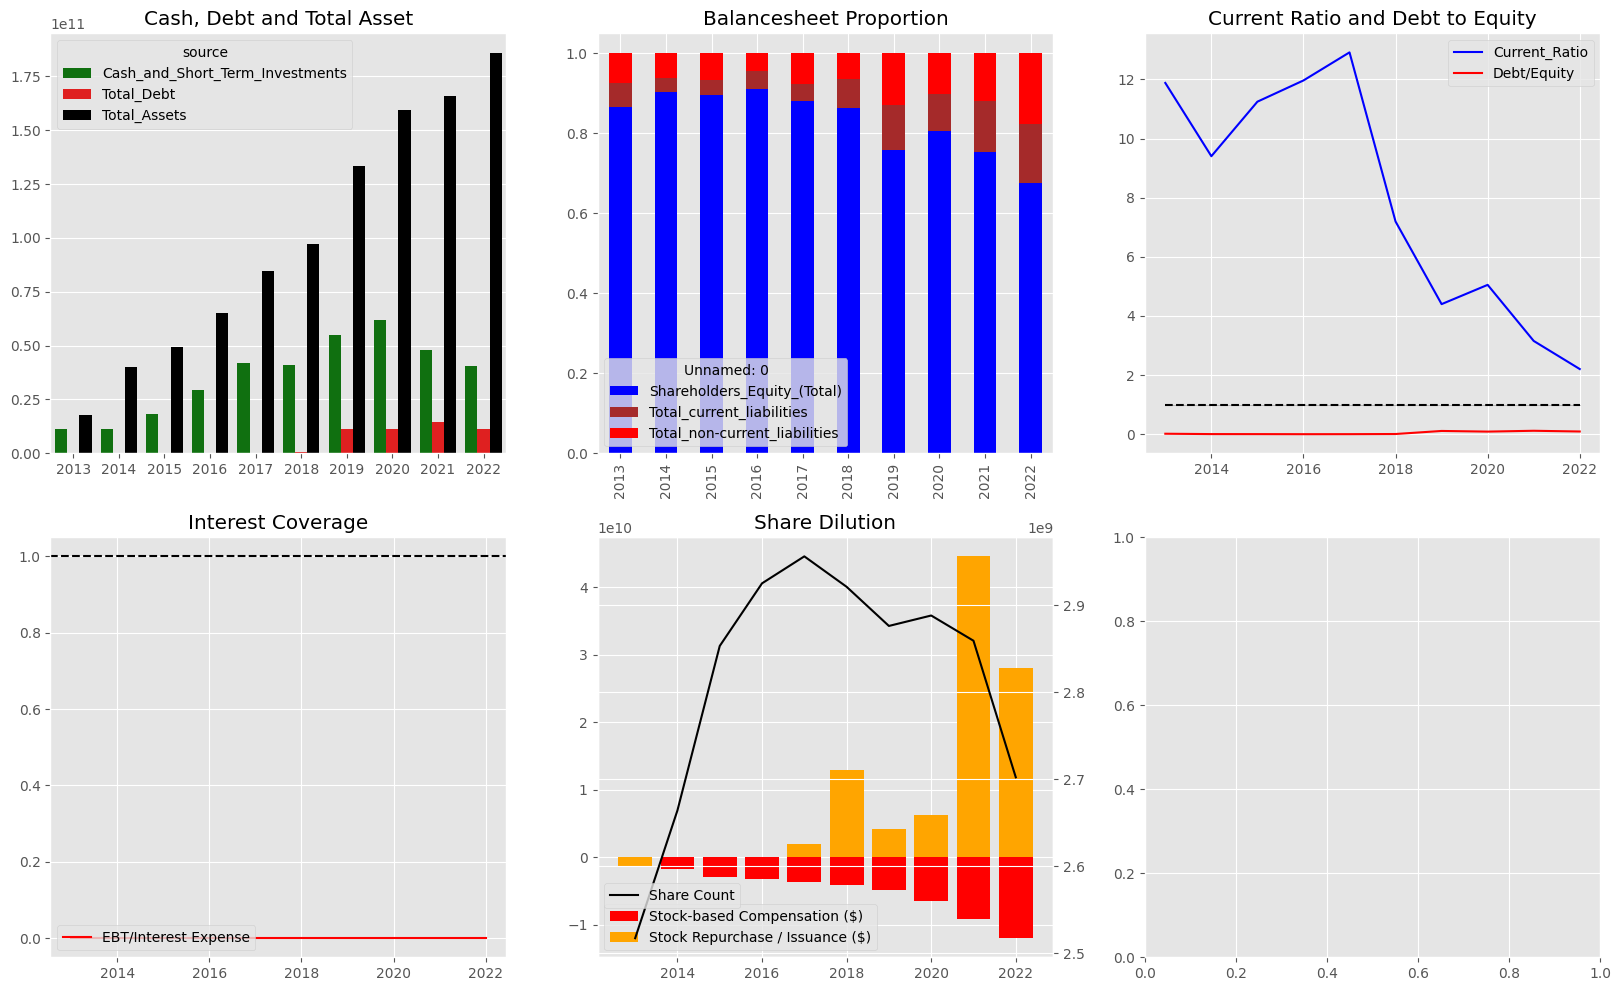

In [8]:
visualisation.visualise_financial_health(df)

In [9]:
#get metrics
SHARE_COUNT = metrics.shares(df)
WACC = metrics.wacc(df,
                     CURRENT_PRICE,
                     market_return_rate=MARKET_RETURN,
                     risk_free_rate=RISK_FREE_RETURN, 
                     beta=BETA)


# get past 4 years performance history

In [10]:
years_to_forecast = 4
OCF_History = list(df.iloc[:years_to_forecast]["Operating_Cash_Flow"])
Net_Income_History = list(df.iloc[:years_to_forecast]["Net_Income_Common"])
FCF_History = list(df.iloc[:years_to_forecast]["Free_Cash_Flow"])
Dividends_History = list(df.iloc[:years_to_forecast]["dividend_per_share"])

In [11]:
# Net_Income_History[-1] = 0.01

# Valuations

### Operating cash flow

In [12]:
OCF_YOY_GROWTH = valuation.get_ave_yoy_growth_DCF_value(history=OCF_History,
                                       cap_growth=CAP_GROWTH, 
                                       wacc=WACC, 
                                       no_of_shares=SHARE_COUNT)

OCF_CAGR_GROWTH = valuation.get_cagr_growth_DCF_value(history=OCF_History,
                                    cap_growth=CAP_GROWTH, 
                                    wacc=WACC, 
                                    no_of_shares=SHARE_COUNT)

In [13]:
print(f"""Value based on YOY OCF projection: {OCF_YOY_GROWTH}
Value based on CAGR OCF projection: {OCF_CAGR_GROWTH}""")

Value based on YOY OCF projection: 296.973651636472
Value based on CAGR OCF projection: 256.1955980266181


### Net income

In [14]:
NI_YOY_GROWTH = valuation.get_ave_yoy_growth_DCF_value(history=Net_Income_History,
                                       cap_growth=CAP_GROWTH, 
                                       wacc=WACC, 
                                       no_of_shares=SHARE_COUNT)

NI_CAGR_GROWTH = valuation.get_cagr_growth_DCF_value(history=Net_Income_History,
                                    cap_growth=CAP_GROWTH, 
                                    wacc=WACC, 
                                    no_of_shares=SHARE_COUNT)

In [15]:
print(f"""Value based on YOY Net Income projection: {NI_YOY_GROWTH}
Value based on CAGR Net Income projection: {NI_CAGR_GROWTH}""")

Value based on YOY Net Income projection: 149.08589394515832
Value based on CAGR Net Income projection: 96.62028592737056


### FCF 

In [16]:
FCF_YOY_GROWTH = valuation.get_ave_yoy_growth_DCF_value(history=FCF_History,
                                       cap_growth=CAP_GROWTH, 
                                       wacc=WACC, 
                                       no_of_shares=SHARE_COUNT)

FCF_CAGR_GROWTH = valuation.get_cagr_growth_DCF_value(history=FCF_History,
                                    cap_growth=CAP_GROWTH, 
                                    wacc=WACC, 
                                    no_of_shares=SHARE_COUNT)
FCF_PERPETUAL = valuation.perpetual_FCF_growth_valuation(history = FCF_History, 
                                                        wacc=WACC, 
                                                        no_of_shares=SHARE_COUNT)

In [17]:
print(f"""Value based on YOY FCF projection: {FCF_YOY_GROWTH}
Value based on CAGR FCF projection: {FCF_CAGR_GROWTH}
Value based on perpetual growth projection: {FCF_PERPETUAL}""")

Value based on YOY FCF projection: 84.14625485844287
Value based on CAGR FCF projection: 45.79170799884274
Value based on perpetual growth projection: 127.20269306036236


In [18]:
### Dividends

In [19]:
try:
    DIVIDENDS_PERPETUAL = valuation.perpetual_dividend_growth_valuation(history = Dividends_History, 
                                                        wacc=WACC)
except ZeroDivisionError:
    DIVIDENDS_PERPETUAL = 0

In [20]:
print(f"Value based on perpetual dividends growth projection: {DIVIDENDS_PERPETUAL}")

Value based on perpetual dividends growth projection: 0


# troubleshoot

In [21]:
print(f"debt weightage: {metrics.debt_weight(df, current_share_price=CURRENT_PRICE)}")
print(f"debt cost: {metrics.debt_cost(df)}")
print(f"debt cost: {metrics.debt_cost(df)}")
print("\n")
print(f"equity weightage: {metrics.equity_weight(df, current_share_price=CURRENT_PRICE)}")
print(f"equity cost: {metrics.equity_cost(market_return_rate=MARKET_RETURN,risk_free_rate=RISK_FREE_RETURN,beta=BETA)}")


debt weightage: 0.021350798321210403
debt cost: 0.013990905911157748
debt cost: 0.013990905911157748


equity weightage: 0.9786492016787895
equity cost: 0.057100000000000005
